In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import plotly.express as px
import plotly.graph_objects as go
from nltk.corpus import stopwords


In [14]:
df_real=pd.read_csv(r"Dataset\zomato.csv")

In [15]:
df_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [16]:
df_real['dish_liked'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
51712     True
51713     True
51714     True
51715    False
51716     True
Name: dish_liked, Length: 51717, dtype: bool

Deleting unnecessary Columns

In [17]:
df_real.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [18]:
df=df_real.drop(['url','phone','menu_item'],axis=1)

In [19]:

df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   dish_liked                   23639 non-null  object
 9   cuisines                     51672 non-null  object
 10  approx_cost(for two people)  51371 non-null  object
 11  reviews_list                 51717 non-null  object
 12  listed_in(type)              51717 non-null  object
 13  listed_in(city)              51

In [21]:
df.isnull().count()#gives the count of nonnull values

address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           51717
votes                          51717
location                       51717
rest_type                      51717
dish_liked                     51717
cuisines                       51717
approx_cost(for two people)    51717
reviews_list                   51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

In [22]:
df.isnull().sum()#return the no of null values

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

As dish_liked has more no of null value we can drop it from the data frame

In [23]:
df=df.drop(['dish_liked'],axis=1)

In [24]:

df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43533 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43533 non-null  object
 1   name                         43533 non-null  object
 2   online_order                 43533 non-null  object
 3   book_table                   43533 non-null  object
 4   rate                         43533 non-null  object
 5   votes                        43533 non-null  int64 
 6   location                     43533 non-null  object
 7   rest_type                    43533 non-null  object
 8   cuisines                     43533 non-null  object
 9   approx_cost(for two people)  43533 non-null  object
 10  reviews_list                 43533 non-null  object
 11  listed_in(type)              43533 non-null  object
 12  listed_in(city)              43533 non-null  object
dtypes: int64(1), object(12)
memory usage

Removing Duplicates

In [25]:
df.duplicated().sum()

39

In [26]:
df.drop_duplicates(inplace=True)

Remaning The columns

In [27]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [28]:
df['votes'].isna().sum()

0

Converting the Data to Respected formates

In [29]:
df['cost']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: cost, Length: 43494, dtype: object

as above cost contains  "," in then to remove them We convert There type to str ,remove the "," then convert it to float data type

In [30]:
df['cost']=df['cost'].astype(str)
df['cost']=df['cost'].apply(lambda x:x.replace(',','.'))
df['cost']=df['cost'].astype(float)
df['cost']

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
51709    800.0
51711    800.0
51712      1.5
51715      2.5
51716      1.5
Name: cost, Length: 43494, dtype: float64

Removing / from rating


In [31]:
df_real['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [32]:
df=df.loc[df.rate!='NEW']
df=df.loc[df.rate!='-'].reset_index(drop=True)
def remove_slash(x):
    if isinstance(x, str):
        return x.replace('/5', '').strip()
    return x


In [33]:
df['rate'] =df['rate'].apply(remove_slash).astype(float)


In [34]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [35]:
df.name=df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True,False),inplace=True)
df.book_table.replace(('Yes','NO'),(True,False),inplace=True)
df['online_order']


0         True
1         True
2         True
3        False
4        False
         ...  
41228    False
41229    False
41230    False
41231    False
41232    False
Name: online_order, Length: 41233, dtype: bool

In [36]:
df['book_table']

0        True
1          No
2          No
3          No
4          No
         ... 
41228      No
41229      No
41230      No
41231    True
41232      No
Name: book_table, Length: 41233, dtype: object

In [37]:

df.isnull().sum()#return the no of null values

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
type            0
city            0
dtype: int64

In [38]:
df.describe()

,rate,votes,cost
count,41233.000000,41233.000000,41233.000000
mean,3.702044,352.804259,369.582096
std,0.440041,884.446054,242.525755
min,1.800000,0.000000,1.000000
25%,3.400000,21.000000,200.000000
50%,3.700000,73.000000,400.000000
75%,4.000000,278.000000,500.000000
max,4.900000,16832.000000,950.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41233 entries, 0 to 41232
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41233 non-null  object 
 1   name          41233 non-null  object 
 2   online_order  41233 non-null  bool   
 3   book_table    41233 non-null  object 
 4   rate          41233 non-null  float64
 5   votes         41233 non-null  int64  
 6   location      41233 non-null  object 
 7   rest_type     41233 non-null  object 
 8   cuisines      41233 non-null  object 
 9   cost          41233 non-null  float64
 10  reviews_list  41233 non-null  object 
 11  type          41233 non-null  object 
 12  city          41233 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(9)
memory usage: 3.8+ MB


In [40]:
df['rate'].count()#Total no of rating values in the DataFrame

41233

In [41]:
df['rate'].unique()#Total no of unique rating value in the DataFrame

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [42]:
df['rate'].unique().sum()

105.3

In [43]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [44]:
df['type'].count()

41233

In [45]:
df['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [46]:
df['reviews_list']

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
41228    [('Rated 4.0', 'RATED\n  Ambience- Big and spa...
41229    [('Rated 4.0', 'RATED\n  A fine place to chill...
41230    [('Rated 5.0', "RATED\n  Food and service are ...
41231    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
41232    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 41233, dtype: object

Names Of Resuturant

In [47]:
rs_name=list(df['name'].unique())
rs_name

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Rosewood International Hotel - Bar & Restaurant',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'Cafã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-Up-Ino',
 "Kirthi'S Biryani",
 'T3H Cafe',
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'Cafe Coffee Day',
 'My Tea House',
 'Hide Out Cafe',
 'Cafe Nova',
 'Coffee Tindi',
 'Sea Green Cafe',
 'Cuppa',
 "Srinathji'S Cafe",
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 'Havyaka Mess',
 "Mcdonald'S",
 "Domino'S Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Petoo',
 'Shree Cool Point'

In [48]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list', 'type',
       'city'],
      dtype='object')

In [49]:
df.city.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [50]:
def citybased(city):
    df['city']=df['city'].str.lower()
    citybase=df[df['city']==city.lower()]
    citybase=citybase.sort_values(by='rate',ascending=False)
    citybase.drop_duplicates(subset='address',keep='first',inplace=True)
    if(citybase.empty==0):
        hname=citybase[['address', 'name', 'cuisines','online_order', 'book_table', 'rate']]
        return hname.head(10)
    else:
        print('No Hotels Available')

In [51]:
df['address'].describe()

count             41233
unique             8792
top       Delivery Only
freq                 86
Name: address, dtype: object

In [52]:
citybased('banashankari')

,address,name,cuisines,online_order,book_table,rate
547,"115, 100 Feet Ring Road, Kathriguppe, Banashan...",Taaza Thindi,South Indian,False,No,4.7
483,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,"Pizza, Cafe, Italian",True,True,4.6
130,"615/1, Ground Floor, Janardhan Mansion, 10th C...",The Blue Wagon - Kitchen,"Cafe, Beverages",True,No,4.6
147,"766/25-01, 47th A Cross, Near Sangam Circle, A...",Shakes Theory,"Beverages, Sandwich",True,No,4.5
191,"81, 36th Cross Road, 5th Block, Jayanagar, Ban...",Karma Kaapi,"Beverages, Tea",True,No,4.4
83,"52, 1st Floor, 33rd Cross, 4th Block, Jayanaga...",Meghana Foods,"Biryani, North Indian, Chinese",True,No,4.4
556,"187, 16th Main, 24th Cross, 2nd Stage, Banasha...",Sri Laxmi Venkateshwara Coffee Bar,South Indian,False,No,4.4
649,"32, Gandhi Bazaar, Near Gandhi Bazaar Circle, ...",Vidyarthi Bhavan,South Indian,False,No,4.4
433,"43, BDA Complex, 2nd Stage, Banashankari, Bang...",Poonam Sweets,Mithai,False,No,4.4
38,"4, Opposite NMKRV College, 21st C Cross Road, ...",Empire Restaurant,"North Indian, Mughlai, South Indian, Chinese",True,No,4.4


Name of cuisines

In [53]:
df.cuisines.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [54]:
rs_cuisines=list(df['cuisines'].unique())
rs_cuisines

['North Indian, Mughlai, Chinese',
 'Chinese, North Indian, Thai',
 'Cafe, Mexican, Italian',
 'South Indian, North Indian',
 'North Indian, Rajasthani',
 'North Indian',
 'North Indian, South Indian, Andhra, Chinese',
 'Pizza, Cafe, Italian',
 'Cafe, Italian, Continental',
 'Cafe, Mexican, Italian, Momos, Beverages',
 'Cafe',
 'Cafe, Chinese, Continental, Italian',
 'Cafe, Continental',
 'Cafe, Fast Food, Continental, Chinese, Momos',
 'Chinese, Cafe, Italian',
 'Cafe, Italian, American',
 'Cafe, French, North Indian',
 'Cafe, Pizza, Fast Food, Beverages',
 'Cafe, Fast Food',
 'Italian, Fast Food, Cafe, European',
 'Cafe, Bakery',
 'Cafe, South Indian',
 'Cafe, Fast Food, Beverages',
 'North Indian, Cafe, Chinese, Fast Food',
 'Cafe, Italian',
 'North Indian, Fast Food, Chinese, Burger',
 'Bakery, Desserts',
 'Pizza',
 'North Indian, Biryani, Fast Food',
 'Biryani',
 'North Indian, Chinese, Fast Food',
 'Chinese, Thai, Momos',
 'North Indian, Mughlai, South Indian, Chinese',
 'South I

In [55]:
def cuisinesbased(cuisines):
    df['cuisines']=df['cuisines'].str.lower()
    cuisinesbase=df[df['cuisines']==cuisines.lower()]
    cuisinesbase=cuisinesbase.sort_values(by='rate',ascending=False)
    cuisinesbase.drop_duplicates(subset='address',keep='first',inplace=True)
    if(cuisinesbase.empty==0):
        hname=cuisinesbase[['address', 'name', 'cuisines','online_order', 'book_table', 'rate']]
        return hname.head(10)
    else:
        print('No Hotels Available')

In [56]:
cuisinesbased('cafe')

,address,name,cuisines,online_order,book_table,rate
9230,"2, Church Street, Bangalore",Matteo Coffea,cafe,False,No,4.4
25434,"17, SBI Colony Service Road, Koramangala 3rd B...",Mimansa @ Foxtrot,cafe,True,True,4.4
19867,"5th A Main Road, 2nd Block, HRBR Layout, Kalya...",The Roastery,cafe,False,No,4.3
6950,"465C, 17th G Main, 80 Feet Road, Koramangala 6...",Bearfoot Cafe,cafe,True,No,4.2
2769,"51 Ground Floor, 5th Main Road, 36th Cross Roa...",Alchemy Coffee Roasters,cafe,False,No,4.2
4052,"5, Inside woodland Hotel, Rajarammohan Roy Roa...",Marzipan @ The Bohemian House,cafe,True,No,4.2
13833,"508, Melmat Building, Near Fabindia, CMH Road,...",Matteo Coffea,cafe,False,No,4.2
40032,"13, White Rose Layout, Abhayadhama Road, Mahad...",Therpup - A Dog Cafe,cafe,False,No,4.2
6373,"61, Seetharampalya - Hoodi Road, Whitefield, B...",Oregano Soul Food,cafe,True,No,4.1
37160,"Ground Floor, Main Between 17th A Cross and 18...",Stevie'S,cafe,True,No,4.1


In [57]:
def mcuisinesbased(df, target_cuisine):
    
    df_copy = df.copy()

    
    df_copy['cuisines'] = df_copy['cuisines'].apply(lambda x: x.lower() if isinstance(x, str) else x)
    df_copy['cuisines'] = df_copy['cuisines'].str.split(',')

    
    mask = df_copy['cuisines'].apply(lambda cuisines: any(target_cuisine.lower() in cuisine for cuisine in cuisines))

    cuisinesbase = df_copy[mask]
    cuisinesbase = cuisinesbase.sort_values(by='rate', ascending=False)
    cuisinesbase.drop_duplicates(subset='name',keep='first',inplace=True)
    if not cuisinesbase.empty:
        hname = cuisinesbase[['address', 'name', 'cuisines', 'online_order', 'book_table', 'rate']]
        return hname.head(10)
    else:
        print(f'No Hotels Available for {target_cuisine}')
        return None


In [58]:
# Assuming df is your DataFrame
result = mcuisinesbased(df, 'Beverages')

if result is not None:
    print(result)

                                                 address  \
35819  2985, 12th Main, HAL 2nd Stage, Indiranagar, B...   
27821  18, Ground Floor, 7th Main, 80ft Road, Koraman...   
36308  1131, 100 Feet Road, HAL 2nd Stage, Indiranaga...   
36310  Next to Apple Of My Eye, 12th Main, 2nd Stage,...   
2802   615/1, Ground Floor, Janardhan Mansion, 10th C...   
37736                       19, Church Street, Bangalore   
14005  610, 3rd Floor, 12th Main, Off 80 Feet Road, I...   
13362  Shop 28, Opposite BDA Complex, 14th Main Road,...   
26644  105, 1st A Cross, Koramangala 5th Block, Banga...   
32377  Sriven Square Building, Ground Floor, Near Kun...   

                                   name  \
35819                  The Pizza Bakery   
27821                 The Pancake Story   
36308                             Smoor   
36310                 Natural Ice Cream   
2802           The Blue Wagon - Kitchen   
37736                         Brik Oven   
14005  The Fatty Bao - Asian Gastro Ba

<Axes: xlabel='book_table', ylabel='count'>

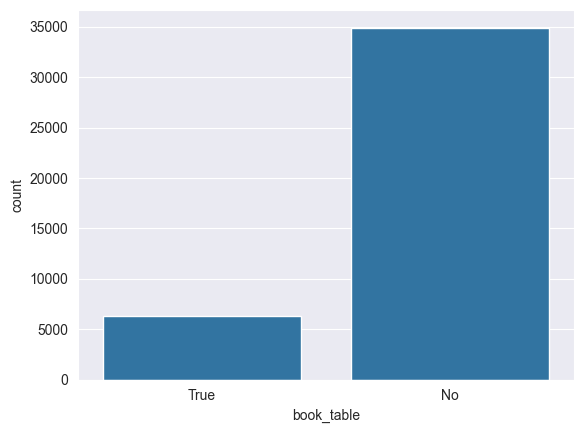

In [59]:
sns.countplot(x='book_table', data=df)

C:\Users\akuma\AppData\Local\Temp\ipykernel_1392\2974854393.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'])


<Axes: xlabel='rate', ylabel='Density'>

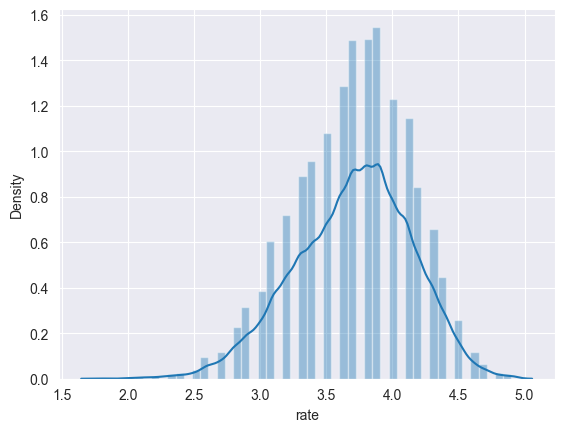

In [60]:
sns.distplot(df['rate'])

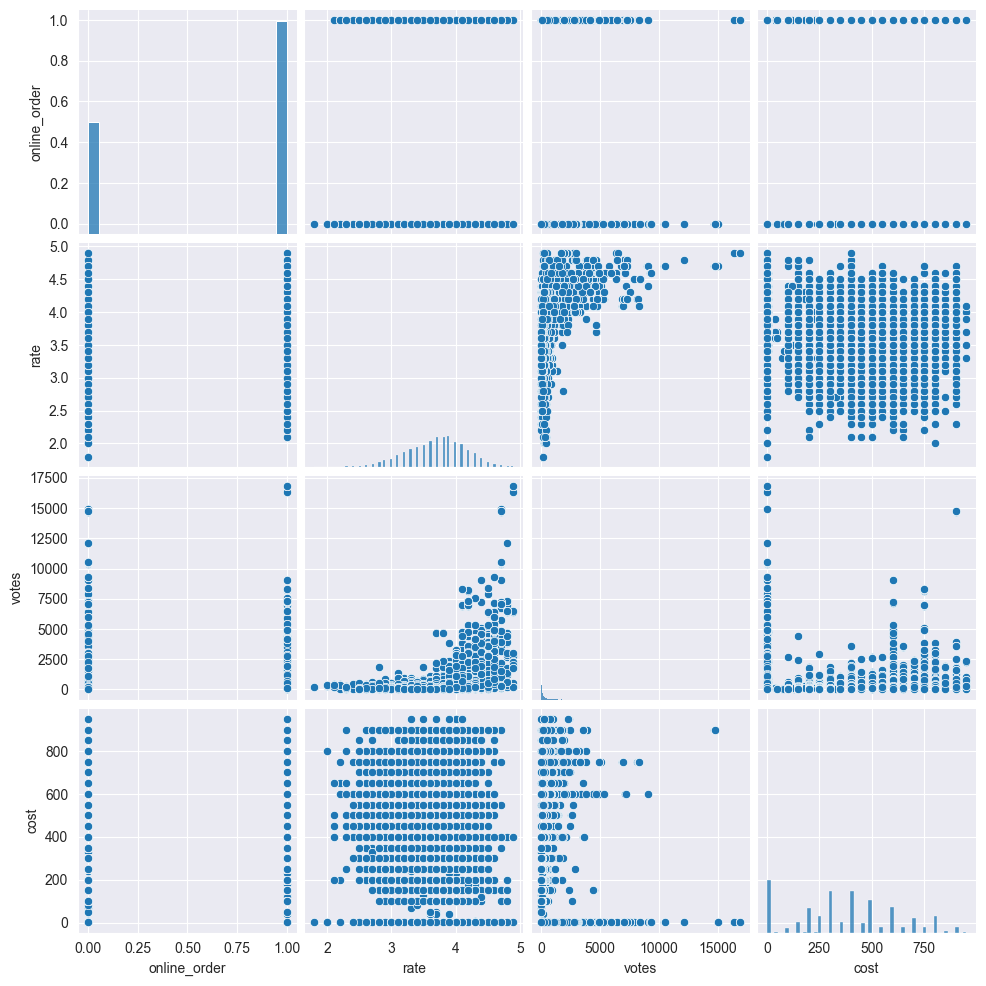

In [61]:
sns.pairplot(df)